In [1]:
#load libraries
import lib
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.neighbors import NearestNeighbors
from sklearn.svm import LinearSVC

In [ ]:
class SVMtree:
    def __init__(self,X,y,depth=5):
        
        svm = find_proper_division(X,y)
        self.svms = [svm]
        self.devisions = [devision(X,y,svm)]
        for i in range(1,depth):
            
        

In [12]:
def plotting_funciton(svm,X,y):
    C = 1.0  # SVM regularization parameter
    # models = (svm.SVC(kernel='linear', C=C),
    #           svm.LinearSVC(C=C, max_iter=10000),
    #           svm.SVC(kernel='rbf', gamma=0.7, C=C),
    #           svm.SVC(kernel='poly', degree=3, gamma='auto', C=C))
    # models = (clf.fit(X, y) for clf in models)

    # title for the plots
    # title = 'SVC with linear kernel'

    # # Set-up 2x2 grid for plotting.
    fig, sub = plt.subplots(1,1)
    plt.subplots_adjust(wspace=0.5, hspace=0.5)

    ax= sub

    X0, X1 = X[:,0], X[:,1]
    xx, yy = lib.make_meshgrid(X0, X1)

    # # ###########################################################################
    w = svm.coef_[0]
    a = -w[0] / w[1]
    XX = np.linspace(-5, 5)
    YY = a * XX - (svm.intercept_[0]) / w[1]
    ax.plot(XX, YY, "-")
    # # ###########################################################################

    # for clf, title, ax in zip(models, titles, sub.flatten()):
    lib.plot_contours(ax, svm, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('0')
    ax.set_ylabel('1')
    ax.set_xticks(())
    ax.set_yticks(())
    # ax.set_title(title)

    plt.show()

In [13]:
#load dataset
X,y = lib.generate_circle(samples=500)

In [14]:
def devision(X,y,svm):
    w = svm.coef_[0]
    a = -w[0] / w[1]
    Xsvm = a * X[:,0] - (svm.intercept_[0]) / w[1]
    div = np.copy(y)
    div.fill(0)
    div[X[:,1]>Xsvm] = 1 #mark points above as 1 and poins below as 0
    return div

In [15]:
#caluculate nearest neighbors
def find_nn(X,y,n_neighbors=50,n_most_different=50):
    nbrs = NearestNeighbors(n_neighbors=n_neighbors, algorithm='ball_tree').fit(X)
    distances, indices = nbrs.kneighbors(X)
    ys = y[indices]
    Xs = X[indices]
    most_different_nn = np.argsort(-np.var(ys,1))[:n_most_different]
    most_different_var = -np.sort(-np.var(ys,1))[:n_most_different]
    return Xs[most_different_nn],ys[most_different_nn],most_different_var

In [16]:
def find_proper_devision(X,y):
    Xs,ys,var = find_nn(X,y)
    combined_score = []
    clf = LinearSVC(random_state=0, tol=1e-5)
    for i in range(len(ys)):
        clf.fit(Xs[i], ys[i])
#         print(f'{clf.score(Xs[i],ys[i])} {clf.score(X,y)}')
#         plotting_funciton(clf,X,y)
        combined_score.append(clf.score(Xs[i], ys[i])*var[i])
    am = np.argmax(combined_score)
    return clf.fit(Xs[am], ys[am])
        

In [17]:
def smallify_dataset(X,y,div):
    y_left = y[div==0]
    X_left = X[div==0]
    y_right = y[div==1]
    X_right = X[div==1]
    return X_left, y_left,  X_right,  y_right

In [18]:
cs = find_proper_devision(X,y)
cs

LinearSVC(random_state=0, tol=1e-05)

In [19]:
div = devision(X,y,cs)

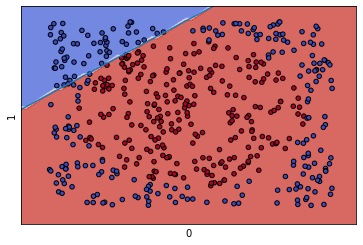

In [20]:
plotting_funciton(cs,X,y)

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification

clf = LinearSVC(random_state=0, tol=1e-5)
clf.fit(X, y)

In [ ]:
Xs[0][:,1]

In [ ]:
plotting_funciton(clf,X,y)

In [ ]:
#generate X,y
X,y = lib.generate_circle(samples=500)
#find proper devision
svm = find_proper_devision(X,y)
#define divider function
div = devision(X,y,svm)
#calculate SVM over children
X_left, y_left,  X_right,  y_right = smallify_dataset(X,y,div)
# svm_left = find_proper_devision(X_left, y_left)
svm_right = find_proper_devision(X_right,  y_right)
plotting_funciton(svm_right,X,y)

In [ ]:
#def take_left(X,y,div):
X_left, y_left,  X_right,  y_right = smallify_dataset(X,y,div)
# svm_left = find_proper_devision(X_left, y_left)
svm_right = find_proper_devision(X_right,  y_right)